In [1]:
import kagglehub
import shutil
import os
import glob

# Scarica il dataset
path = kagglehub.dataset_download("tunguz/used-car-auction-prices")

# Definisci la cartella di destinazione
destination_folder = "../datasets"

# Crea la cartella se non esiste
os.makedirs(destination_folder, exist_ok=True)

# Trova tutti i file CSV nella cartella scaricata
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Sposta solo i file CSV nella cartella desiderata
for file in csv_files:
    shutil.move(file, destination_folder)

# Opzionale: Rimuove la cartella originale se è vuota
if not os.listdir(path):
    os.rmdir(path)

print(f"Dataset spostato in: {destination_folder}")

C:\Users\raffa\PycharmProjects\PythonProject2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 19.0M/19.0M [00:02<00:00, 7.10MB/s]

Extracting files...


Dataset spostato in: ../datasets


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, numpy as np


diagrams_dir = "../diagrams"
df = pd.read_csv('../datasets/car_prices.csv', on_bad_lines="skip")

In [3]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
df.describe(include='number')

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Grafico salvato come 'missing_values_bar_chart.svg'


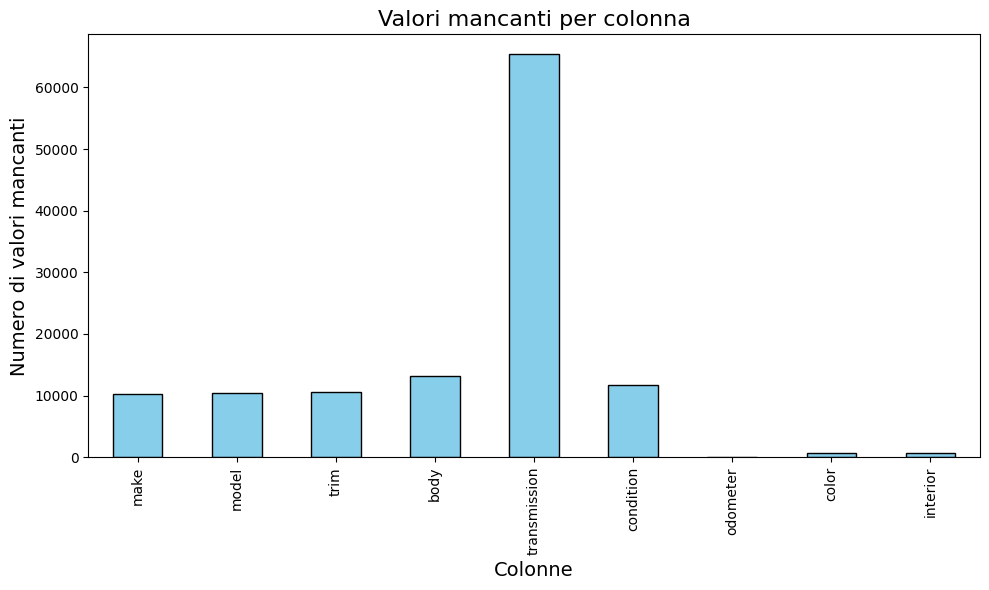

In [7]:
df.isnull().sum()

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Valori mancanti per colonna', fontsize=16)
    plt.xlabel('Colonne', fontsize=14)
    plt.ylabel('Numero di valori mancanti', fontsize=14)
    plt.tight_layout()

    plt.savefig(f'{diagrams_dir}/missing_values_bar_chart.svg')
    print("Grafico salvato come 'missing_values_bar_chart.svg'")
else:
    print("Non ci sono valori mancanti nel dataset.")

In [8]:
def plot_distribution(df, column_name, labels, bins, palette='Blues', right=False, output_dir=diagrams_dir):
    """
    Crea una nuova feature categorizzando i valori di una colonna in intervalli basati sui quantili e genera un istogramma della distribuzione.

    Args:
        df (pd.DataFrame): DataFrame contenente la colonna da analizzare.
        column_name (str): Nome della colonna su cui basare il plot.
        bins (list): Lista dei limiti per i bin.
        labels (list): Lista delle etichette da associare ai bin.
        palette (str, optional): Palette di colori per il plot.
        right (bool, optional): Determina se l'intervallo include il limite destro.
        output_dir (str, optional): Directory in cui salvare il grafico.

    Returns:
        pd.DataFrame: DataFrame con la nuova feature 'value_range'.
    """
    df_tmp = df.copy()

    # Creazione della nuova feature categorizzata
    df_tmp[f'{column_name}_range'] = pd.cut(df_tmp[column_name], bins=bins, labels=labels, right=right)

    # Creazione del grafico
    plt.figure(figsize=(12, 6), facecolor='white')  # Imposta lo sfondo della figura a bianco
    ax = plt.gca()
    ax.set_facecolor('white')  # Imposta lo sfondo dell'area dell'asse a bianco

    # Crea il countplot
    sns.countplot(x=f'{column_name}_range', data=df_tmp, hue=f'{column_name}_range',
                  palette=palette, order=labels, legend=False)

    # Imposta il titolo e le etichette
    plt.title(f'Distribuzione dei {column_name}', fontsize=16)
    plt.xlabel(f'Intervallo di {column_name}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.ylabel('Frequenza', fontsize=12)
    plt.grid(axis='y', alpha=0.3)

    # Imposta il bordo dell'asse su nero
    for spine in ax.spines.values():
        spine.set_edgecolor('black')

    # Salvataggio del grafico
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, f'{column_name}_distribution.svg')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Grafico salvato in {plot_path}")

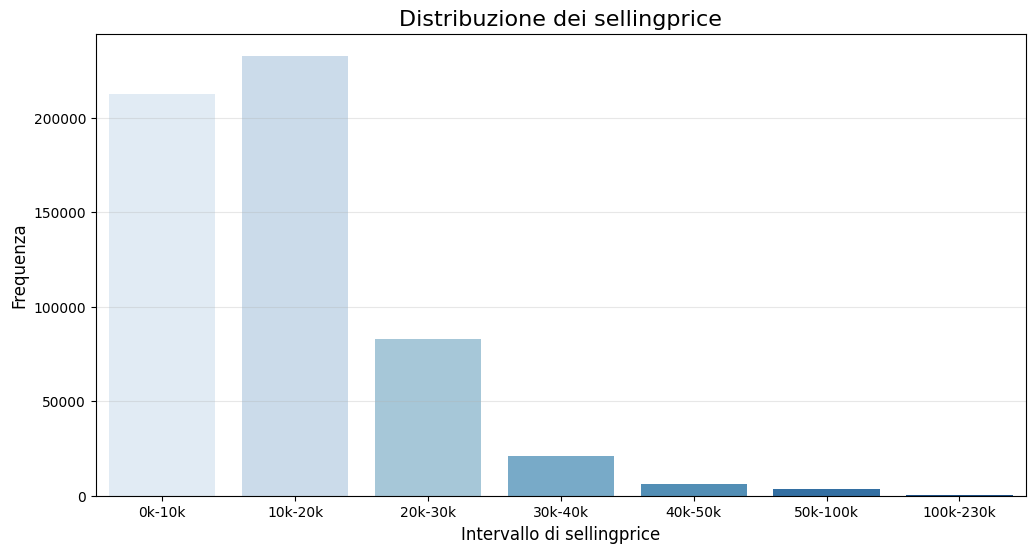

Grafico salvato in ../diagrams\sellingprice_distribution.svg


In [9]:
# confini di ciascun intervallo per il prezzo
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 100000, 230000]
# etichette degli intervalli per il prezzo
price_labels = ["0k-10k", "10k-20k", "20k-30k", "30k-40k", "40k-50k","50k-100k","100k-230k"]
plot_distribution(df, 'sellingprice', price_labels, price_bins)

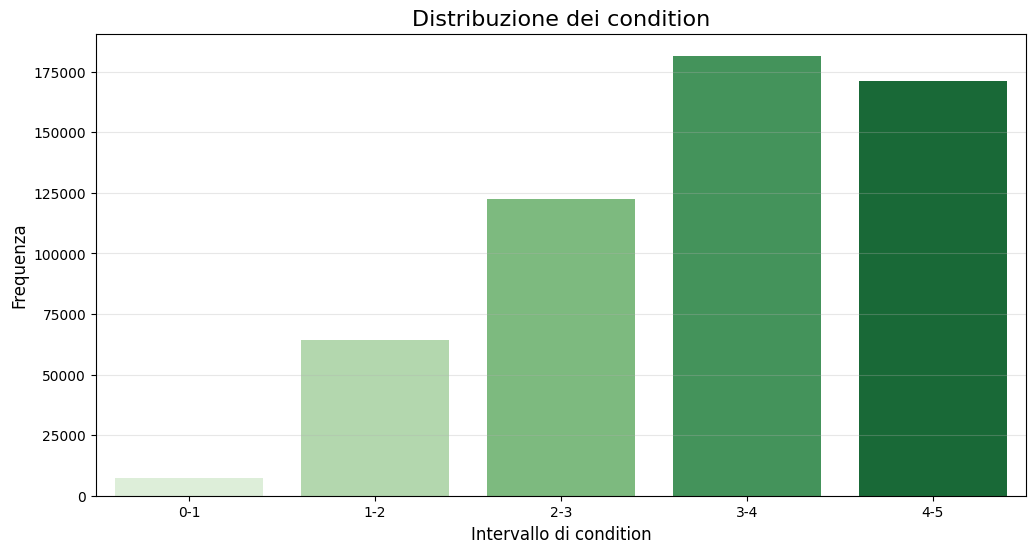

Grafico salvato in ../diagrams\condition_distribution.svg


In [10]:
condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
plot_distribution(df, 'condition', condition_labels, condition_bins, 'Greens', True)

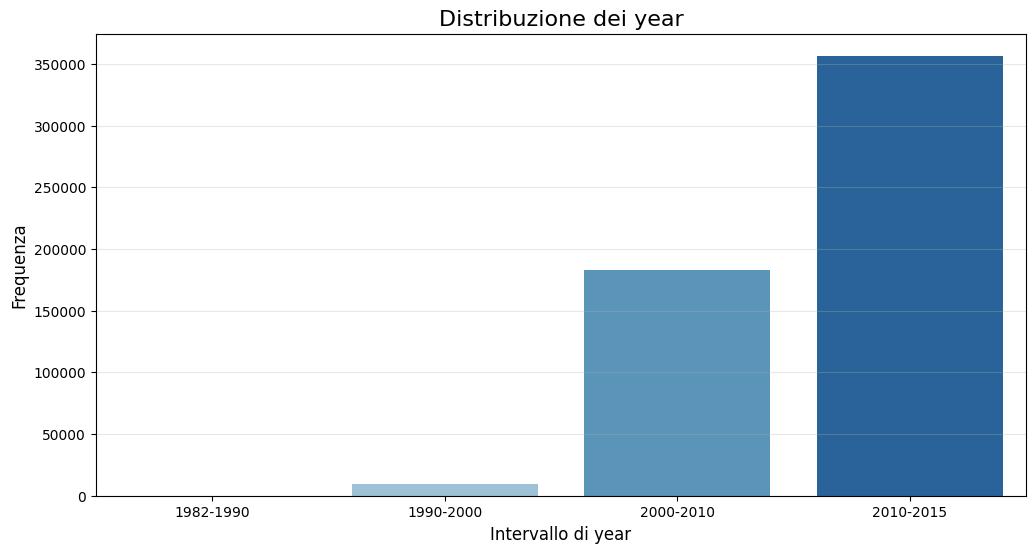

Grafico salvato in ../diagrams\year_distribution.svg


In [11]:
year_bins = [1982, 1990, 2000, 2010, 2015]
year_labels = ["1982-1990", "1990-2000", "2000-2010", "2010-2015"]
plot_distribution(df, 'year', year_labels, year_bins)

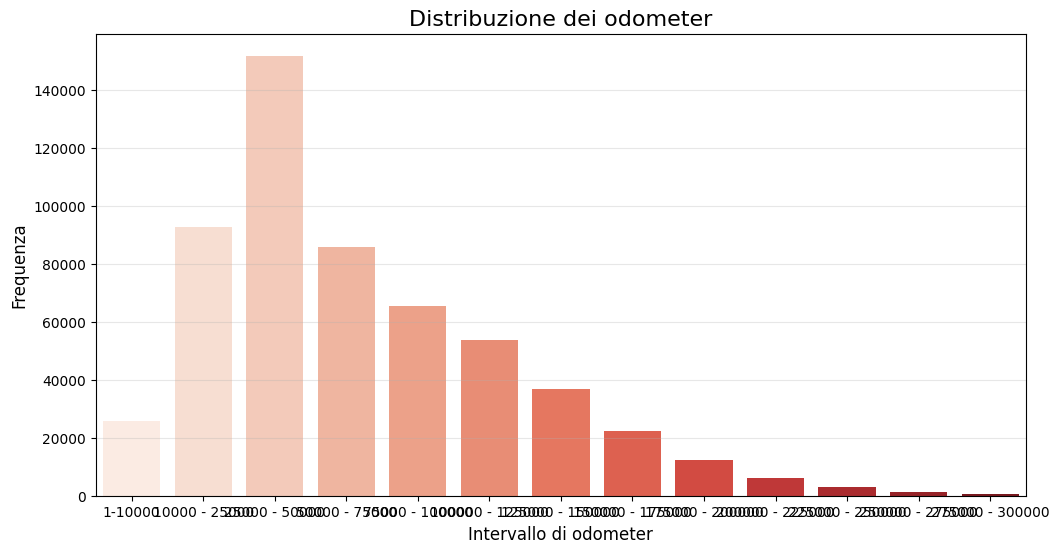

Grafico salvato in ../diagrams\odometer_distribution.svg


In [12]:
odometer_bins = [1, 10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000]
odomete_labels = ['1-10000', '10000 - 25000', '25000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 125000', '125000 - 150000', '150000 - 175000', '175000 - 200000', '200000 - 225000', '225000 - 250000', '250000 - 275000', '275000 - 300000']
plot_distribution(df, 'odometer', odomete_labels, odometer_bins, 'Reds')

In [13]:
df.duplicated().sum()


0

In [15]:
def plot_line_chart(df, x_column, y_column='sellingprice', output_dir="../diagrams"):
    """
    Crea un grafico a linee tra due variabili (una sul lato x e una sul lato y) e salva l'immagine.

    Args:
        df (pd.DataFrame): DataFrame contenente le colonne da plottare.
        x_column (str): Nome della colonna da utilizzare sull'asse X.
        y_column (str): Nome della colonna da utilizzare sull'asse Y.
        output_dir (str, optional): Directory in cui salvare il grafico.

    Returns:
        None
    """
    # Creazione del grafico
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_column, y=y_column, data=df, color='black', marker='o', linewidth=2, label=y_column)

    # Titolo e etichette
    plt.title(f'{y_column} vs. {x_column}', fontsize=16)
    plt.xlabel(x_column.capitalize(), fontsize=12)
    plt.ylabel(y_column.capitalize(), fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()

    # Salvataggio del grafico
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, f'{x_column}_vs_{y_column}_line_plot.svg')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Grafico salvato in {plot_path}")

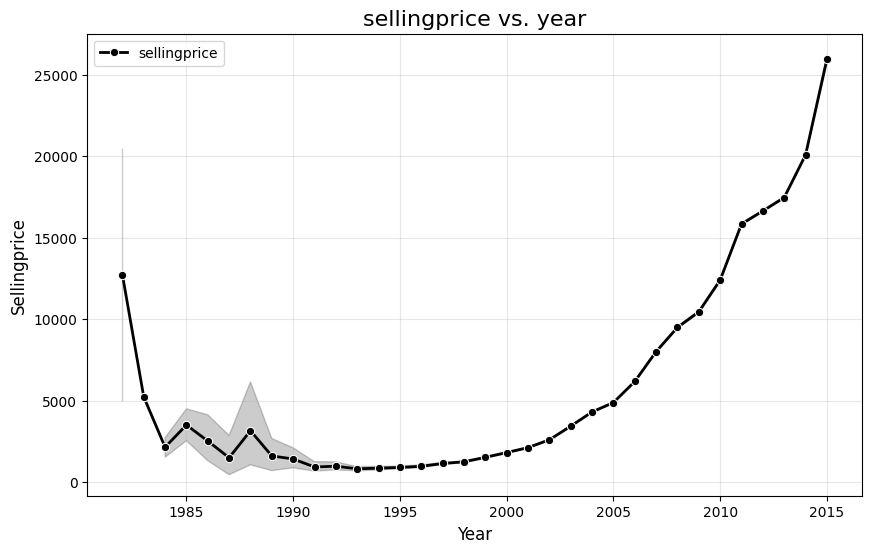

Grafico salvato in ../diagrams\year_vs_sellingprice_line_plot.svg


In [16]:
plot_line_chart(df, 'year')

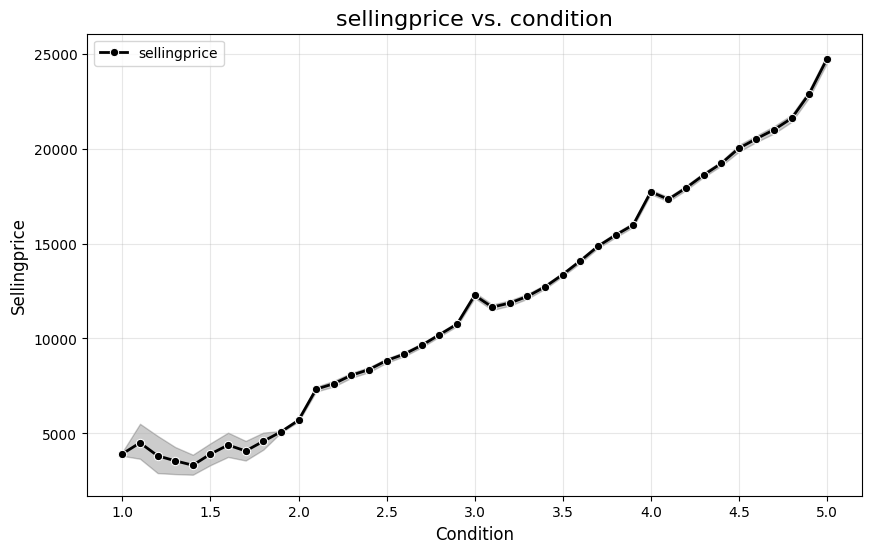

Grafico salvato in ../diagrams\condition_vs_sellingprice_line_plot.svg


In [17]:
plot_line_chart(df, 'condition')


In [ ]:
plot_line_chart(df, 'odometer')


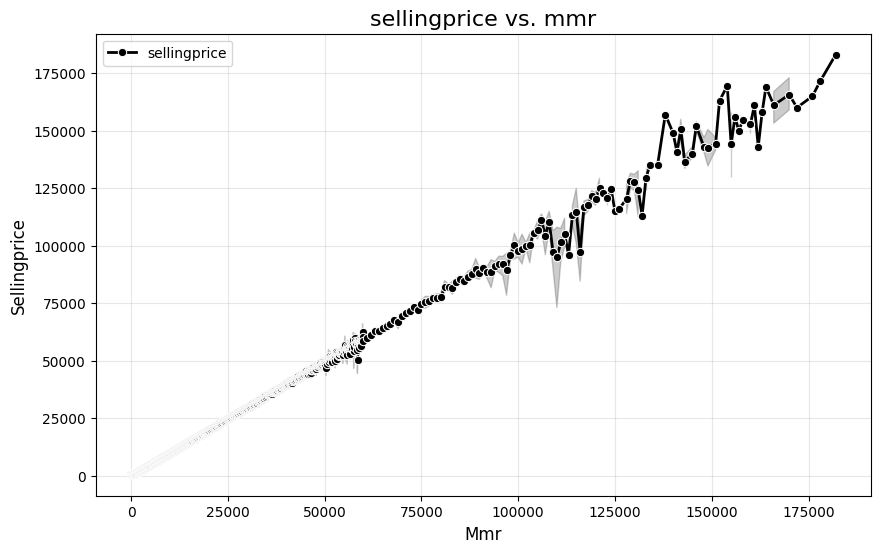

Grafico salvato in ../diagrams\mmr_vs_sellingprice_line_plot.svg


In [18]:
plot_line_chart(df, 'mmr')


In [19]:
# Selezione dinamica delle caratteristiche numeriche
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Calcolo della matrice di correlazione
corr_matrix = df[numerical_features].corr()

# Creazione della heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matrice di correlazione delle caratteristiche numeriche', fontsize=16)

os.makedirs(diagrams_dir, exist_ok=True)
path = f"{diagrams_dir}/correlation_matrix.svg"
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Matrice di correlazione salvata in {path}")

Matrice di correlazione salvata in ../diagrams/correlation_matrix.svg
